# <center>Predict Oligomeric State of Proteins</center>


## Importing Libraries

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Using TensorFlow backend.


## Deep Learning

In [2]:
df1 = pd.read_csv('oligomeric.csv')

In [3]:
df1 = df1[['AminoAcidSequence','OligomericState']]

In [4]:
df1["OligomericState"] = df1["OligomericState"].replace({"Dimer": "D","Monomer":"M",'Tetramer':'S'})

In [5]:
df1

,AminoAcidSequence,OligomericState
0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
1,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
2,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
3,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
4,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
...,...,...
404,MRGSHHHHHHGMASMTGGQQMGRNLYDDDDKDPGSHMSVIKPDMKI...,S
405,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,S
406,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,S
407,MRSSKNVIKEFMRFKVRMEGTVNGHEFEIEGEGEGRPYEGHNTVKL...,S


In [6]:
seqs = df1.AminoAcidSequence.values

In [7]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(df1.OligomericState)

In [8]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 256

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

embedding_dim = 8

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 8)            184       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 64)           3136      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 128, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 128, 32)           6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 64, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
______________________________________

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64)

Train on 327 samples, validate on 82 samples
Epoch 1/200
327/327 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9664 - val_loss: 0.2145 - val_accuracy: 0.9390
Epoch 2/200
327/327 [==============================] - 0s 67us/step - loss: 0.1417 - accuracy: 0.9633 - val_loss: 0.1782 - val_accuracy: 0.9634
Epoch 3/200
327/327 [==============================] - 0s 67us/step - loss: 0.0949 - accuracy: 0.9755 - val_loss: 0.1534 - val_accuracy: 0.9634
Epoch 4/200
327/327 [==============================] - 0s 64us/step - loss: 0.0605 - accuracy: 0.9755 - val_loss: 0.1002 - val_accuracy: 0.9756
Epoch 5/200
327/327 [==============================] - 0s 65us/step - loss: 0.0484 - accuracy: 0.9817 - val_loss: 0.1202 - val_accuracy: 0.9756
Epoch 6/200
327/327 [==============================] - 0s 65us/step - loss: 0.0409 - accuracy: 0.9847 - val_loss: 0.1448 - val_accuracy: 0.9634
Epoch 7/200
327/327 [==============================] - 0s 64us/step - loss: 0.0264 - accurac

327/327 [==============================] - 0s 65us/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.3457 - val_accuracy: 0.9146
Epoch 114/200
327/327 [==============================] - 0s 65us/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.3476 - val_accuracy: 0.9146
Epoch 115/200
327/327 [==============================] - 0s 66us/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.3508 - val_accuracy: 0.9146
Epoch 116/200
327/327 [==============================] - 0s 65us/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.3488 - val_accuracy: 0.9146
Epoch 117/200
327/327 [==============================] - 0s 66us/step - loss: 0.0066 - accuracy: 0.9969 - val_loss: 0.3433 - val_accuracy: 0.9146
Epoch 118/200
327/327 [==============================] - 0s 66us/step - loss: 0.0057 - accuracy: 0.9969 - val_loss: 0.3385 - val_accuracy: 0.9146
Epoch 119/200
327/327 [==============================] - 0s 65us/step - loss: 0.0055 - accuracy: 0.9969 - val_loss: 0.3359 - val_accuracy:

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [21]:
np.argmax(test_pred, axis=1)

array([1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1])

In [22]:
np.argmax(y_test, axis=1)

array([1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1])

In [23]:
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

train-acc = 0.9969418960244648
test-acc = 0.926829268292683


In [24]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

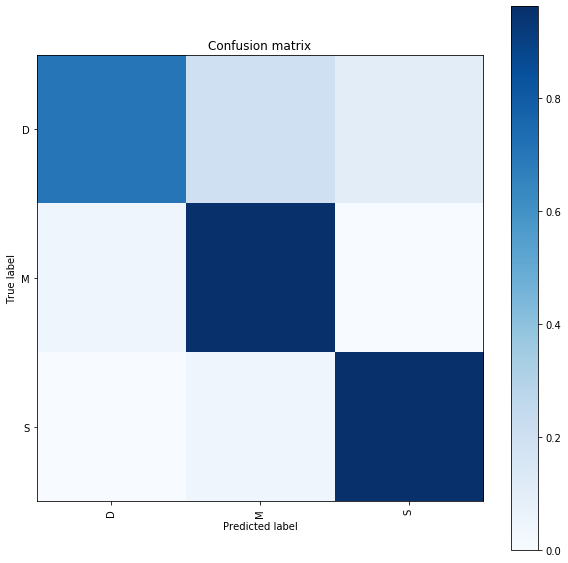

              precision    recall  f1-score   support

           D       0.78      0.70      0.74        10
           M       0.94      0.96      0.95        46
           S       0.96      0.96      0.96        26

    accuracy                           0.93        82
   macro avg       0.89      0.87      0.88        82
weighted avg       0.92      0.93      0.93        82



In [25]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

In [18]:
from keras.models import load_model

model.save('outputs_DL/model.h5') 

In [19]:
test = 'NVIKPFMRFKVHMEGSVNGHEFEIEGEGEGKPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKVYTKHPADIPDYKKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGTFIYHVKFIGVNFPSDGPVMQKKTLGWEPSTERLYPRDGVLKGEIHKALKLKGGGHYLCEFKSIYMAKKPVKLPGYYYVDSKLDITSHNEDYTVVEQYERTEARHHLFL'

In [20]:
import pandas as pd 
  
# initialize list of lists 
data = [[test]] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data, columns = ['Text']) 
  

In [21]:
sent = df2.Text.values

In [22]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(sent)

In [23]:
test_1 = tokenizer.texts_to_sequences(sent)
test_1 = sequence.pad_sequences(test_1, maxlen=max_length)

In [24]:
pro = model.predict(test_1)

In [25]:
prob = model.predict_proba(test_1)

In [26]:
prob

array([[4.79e-01, 5.21e-01, 1.82e-04]], dtype=float32)

In [27]:
np.argmax(pro, axis=1)

array([1])

## Data Preprocessing for Simple Transformer

In [139]:
df = pd.read_csv('oligomeric.csv')

In [140]:
df = df[['AminoAcidSequence','OligomericState']]

In [141]:
df["OligomericState"] = df["OligomericState"].replace({"Dimer": "D","Monomer":"M",'Tetramer':'S'})

In [142]:
df.head(400)

,AminoAcidSequence,OligomericState
0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
1,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
2,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
3,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
4,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,D
...,...,...
395,MRGSHHHHHHTDPSSRSKTMSVIATQMTYKVYMSGTVNGHYFEVEG...,S
396,MSLPATHELHIFGSFNGVDFDMVGRGTGNPNDGYEELNLKSTKGAL...,S
397,MDSTENVIKPFMRFKVHMEGSVNGHEFEIEGEGEGKPYEGTQTAKL...,S
398,MDSTENVIKPFMRFKVHMEGSVNGHEFEIEGEGEGKPYEGTHTVKL...,S


In [143]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('OligomericState')),
                          columns=mlb.classes_))

In [144]:
df['text'] = df['AminoAcidSequence']

In [145]:
df['labels'] = list(zip(df.D.values.tolist(),df.M.values.tolist(),df.S.values.tolist()))

In [146]:
df

,AminoAcidSequence,D,M,S,text,labels
0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1,0,0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"(1, 0, 0)"
1,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1,0,0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"(1, 0, 0)"
2,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1,0,0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"(1, 0, 0)"
3,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1,0,0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"(1, 0, 0)"
4,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1,0,0,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,"(1, 0, 0)"
...,...,...,...,...,...,...
404,MRGSHHHHHHGMASMTGGQQMGRNLYDDDDKDPGSHMSVIKPDMKI...,0,0,1,MRGSHHHHHHGMASMTGGQQMGRNLYDDDDKDPGSHMSVIKPDMKI...,"(0, 0, 1)"
405,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,0,0,1,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,"(0, 0, 1)"
406,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,0,0,1,MSVIKPDMKIKLRMEGAVNGHPFAIEGVGLGKPFEGKQSMDLKVKE...,"(0, 0, 1)"
407,MRSSKNVIKEFMRFKVRMEGTVNGHEFEIEGEGEGRPYEGHNTVKL...,0,0,1,MRSSKNVIKEFMRFKVRMEGTVNGHEFEIEGEGEGRPYEGHNTVKL...,"(0, 0, 1)"


In [147]:
from sklearn.model_selection import train_test_split


train_df, eval_df = train_test_split(df, test_size=0.1)

In [177]:
eval_df

,AminoAcidSequence,D,M,S,text,labels
316,MVSVIAKQMTYKVYMSGTVNGHYFEVEGDGKGKPYEGEQTVKLTVT...,0,0,1,MVSVIAKQMTYKVYMSGTVNGHYFEVEGDGKGKPYEGEQTVKLTVT...,"(0, 0, 1)"
340,MSLSKHGITQEMPTKYHMKGSVNGHEFEIEGVGTGHPYEGTHMAEL...,0,0,1,MSLSKHGITQEMPTKYHMKGSVNGHEFEIEGVGTGHPYEGTHMAEL...,"(0, 0, 1)"
71,HHHHHHMSAIKPDMKINLRMEGNVNGHHFVIDGDGTGKPFEGKQSM...,0,1,0,HHHHHHMSAIKPDMKINLRMEGNVNGHHFVIDGDGTGKPFEGKQSM...,"(0, 1, 0)"
379,MSLSKQVLPRDVKMRFHMDGCVNGHSFTIEGEGTGKPYEGKKTLKL...,0,0,1,MSLSKQVLPRDVKMRFHMDGCVNGHSFTIEGEGTGKPYEGKKTLKL...,"(0, 0, 1)"
147,MVSKGEETTMGVIKPDMKIKLKMEGNVNGHAFVIEGEGEGKPYDGT...,0,1,0,MVSKGEETTMGVIKPDMKIKLKMEGNVNGHAFVIEGEGEGKPYDGT...,"(0, 1, 0)"
26,MVSVIAKQMTYKVYMSGTVNGHYFEVEGDGKGKPYEGEQTVKLTVT...,1,0,0,MVSVIAKQMTYKVYMSGTVNGHYFEVEGDGKGKPYEGEQTVKLTVT...,"(1, 0, 0)"
145,MVSKGEETTMGVIKPDMKIKLKMEGNVNGHAFVIEGEGEGKPYDGT...,0,1,0,MVSKGEETTMGVIKPDMKIKLKMEGNVNGHAFVIEGEGEGKPYDGT...,"(0, 1, 0)"
308,MRGSHHHHHHGSALSNKFIGDDMKMTYHMDGCVNGHYFTVKGEGNG...,0,0,1,MRGSHHHHHHGSALSNKFIGDDMKMTYHMDGCVNGHYFTVKGEGNG...,"(0, 0, 1)"
306,MRGSHHHHHHGSALSNKFIGDDMKMTYHMDGCVNGHYFTVKGEGNG...,0,0,1,MRGSHHHHHHGSALSNKFIGDDMKMTYHMDGCVNGHYFTVKGEGNG...,"(0, 0, 1)"
266,MSAIKPDMKIKLRMEGNVNGHHFVIDGDGTGKPFEGKQSMDLEVKE...,0,1,0,MSAIKPDMKIKLRMEGNVNGHHFVIDGDGTGKPFEGKQSMDLEVKE...,"(0, 1, 0)"


## Implementing Roberta 

In [152]:

from simpletransformers.classification import MultiLabelClassificationModel


model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=3, args={'train_batch_size':1, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 20, 'max_seq_length': 512})
#view rawmodel.py hosted with ❤ by GitHub

In [150]:
import apex
from apex import amp

In [153]:

model.train_model(train_df)


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.691974

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 1.091735


Running loss: 0.842197


Running loss: 0.334709

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.314147


Running loss: 0.363686


Running loss: 0.196729


Running loss: 0.073600


Running loss: 0.109877


Running loss: 0.116144Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 65536.0
Running loss: 0.792900


Running loss: 1.690768


Running loss: 0.059782


Running loss: 0.064834


Running loss: 0.044821


Running loss: 0.037817Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 1.879565


Running loss: 0.041749


Running loss: 0.047494


Running loss: 0.032762


Running loss: 0.029804


Running loss: 0.024653


Running loss: 0.029665


Running loss: 0.501878



In [154]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [133]:
result

{'LRAP': 0.701219512195122, 'eval_loss': 0.6239750168540261}

In [155]:
result

{'LRAP': 0.8617886178861788, 'eval_loss': 0.5063133388757706}

In [162]:
eval_df.to_csv("eval.csv")

In [156]:
model_outputs

array([[0.05966187, 0.9121094 , 0.02191162],
       [0.02470398, 0.02029419, 0.9741211 ],
       [0.11962891, 0.5649414 , 0.23840332],
       [0.02655029, 0.02111816, 0.97558594],
       [0.02790833, 0.9760742 , 0.01567078],
       [0.04931641, 0.9375    , 0.01887512],
       [0.0279541 , 0.9760742 , 0.01554108],
       [0.02575684, 0.01979065, 0.97314453],
       [0.02575684, 0.01983643, 0.97314453],
       [0.06222534, 0.64160156, 0.22570801],
       [0.02784729, 0.9760742 , 0.01560211],
       [0.89990234, 0.0803833 , 0.08740234],
       [0.02711487, 0.97558594, 0.01622009],
       [0.02676392, 0.01911926, 0.97314453],
       [0.8979492 , 0.08050537, 0.08789062],
       [0.07208252, 0.01312256, 0.9316406 ],
       [0.02937317, 0.9760742 , 0.01417542],
       [0.02748108, 0.23876953, 0.7133789 ],
       [0.02409363, 0.02661133, 0.97753906],
       [0.02970886, 0.9765625 , 0.01445007],
       [0.0202179 , 0.1015625 , 0.8613281 ],
       [0.03167725, 0.9741211 , 0.01306915],
       [0.

## Implementing Bert

In [164]:

from simpletransformers.classification import MultiLabelClassificationModel


model = MultiLabelClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'train_batch_size':1, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 10, 'max_seq_length': 512})
#view rawmodel.py hosted with ❤ by GitHub

In [165]:
model.train_model(train_df)


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.455913

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.504997


Running loss: 0.264276


Running loss: 0.416540

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.160232


Running loss: 0.295652


Running loss: 0.177155Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 0.159426


Running loss: 0.109709


Running loss: 0.144266


Running loss: 0.088681


Running loss: 0.222605Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 0.085324


Running loss: 0.081803



In [166]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [167]:
result

{'LRAP': 0.8536585365853658, 'eval_loss': 0.4469381719827652}

In [168]:
model_outputs

array([[0.05889893, 0.8149414 , 0.05081177],
       [0.08978271, 0.09570312, 0.88427734],
       [0.19360352, 0.6123047 , 0.05389404],
       [0.09204102, 0.08850098, 0.8823242 ],
       [0.08569336, 0.92822266, 0.02056885],
       [0.06021118, 0.8251953 , 0.04586792],
       [0.08660889, 0.92822266, 0.02041626],
       [0.09136963, 0.10430908, 0.8833008 ],
       [0.09075928, 0.10821533, 0.88183594],
       [0.17919922, 0.48266602, 0.13085938],
       [0.07318115, 0.9355469 , 0.02508545],
       [0.29174805, 0.68847656, 0.02706909],
       [0.10430908, 0.9086914 , 0.0202179 ],
       [0.22265625, 0.07751465, 0.734375  ],
       [0.29052734, 0.6899414 , 0.02696228],
       [0.4326172 , 0.09075928, 0.5654297 ],
       [0.12524414, 0.87402344, 0.0184021 ],
       [0.09075928, 0.08898926, 0.8769531 ],
       [0.10540771, 0.07977295, 0.8852539 ],
       [0.10449219, 0.9086914 , 0.01763916],
       [0.07263184, 0.17285156, 0.7080078 ],
       [0.16687012, 0.8520508 , 0.01843262],
       [0.

## Implementing XLNET

In [181]:

from simpletransformers.classification import MultiLabelClassificationModel


model = MultiLabelClassificationModel('xlnet', 'xlnet-base-cased', num_labels=3, args={'train_batch_size':1, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 10, 'max_seq_length': 512})
#view rawmodel.py hosted with ❤ by GitHub

In [182]:
model.train_model(train_df)


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.671530

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.436782


Running loss: 0.458217


Running loss: 0.658873

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.712574


Running loss: 0.245303


Running loss: 1.238321


Running loss: 0.137484


Running loss: 0.883676


Running loss: 0.403312


Running loss: 0.029548


Running loss: 0.035520



In [183]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [184]:
result

{'LRAP': 0.8455284552845528, 'eval_loss': 0.42762846499681473}

In [185]:
model_outputs

array([[0.03985596, 0.93066406, 0.01146698],
       [0.04602051, 0.06524658, 0.91064453],
       [0.30322266, 0.4152832 , 0.21130371],
       [0.04940796, 0.06561279, 0.89501953],
       [0.0244751 , 0.96728516, 0.00894928],
       [0.03720093, 0.93603516, 0.01081848],
       [0.0244751 , 0.96728516, 0.00894928],
       [0.04788208, 0.07043457, 0.9160156 ],
       [0.04812622, 0.07080078, 0.9160156 ],
       [0.3017578 , 0.4025879 , 0.22216797],
       [0.07965088, 0.91015625, 0.00930023],
       [0.3708496 , 0.6484375 , 0.01953125],
       [0.02488708, 0.9663086 , 0.0088501 ],
       [0.05194092, 0.06384277, 0.8881836 ],
       [0.36816406, 0.64990234, 0.01937866],
       [0.06021118, 0.07208252, 0.86376953],
       [0.30566406, 0.7158203 , 0.0165863 ],
       [0.14404297, 0.11950684, 0.72753906],
       [0.06622314, 0.0668335 , 0.8696289 ],
       [0.02670288, 0.96875   , 0.00881195],
       [0.08050537, 0.08740234, 0.8198242 ],
       [0.02470398, 0.96875   , 0.00867462],
       [0.

## Implementing DistilBERT

In [186]:

from simpletransformers.classification import MultiLabelClassificationModel


model = MultiLabelClassificationModel('distilbert', 'distilbert-base-uncased-distilled-squad', num_labels=3, args={'train_batch_size':1, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 10, 'max_seq_length': 512})
#view rawmodel.py hosted with ❤ by GitHub

In [187]:
model.train_model(train_df)


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.690202

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.386075


Running loss: 0.944592


Running loss: 0.879958

/root/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.392857


Running loss: 0.466710


Running loss: 0.395733


Running loss: 0.404238


Running loss: 0.412598


Running loss: 0.424099


Running loss: 0.437532


Running loss: 0.674680



In [188]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [189]:
result

{'LRAP': 0.6829268292682927, 'eval_loss': 0.6493139068285624}

In [196]:
model_outputs

array([[0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15588379, 0.5600586 , 0.26635742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.15588379, 0.5600586 , 0.26635742],
       [0.15246582, 0.50927734, 0.32885742],
       [0.

## Final Model Selection

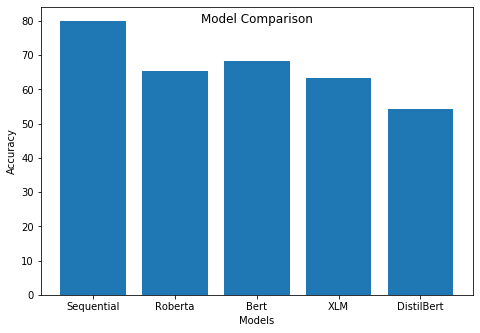

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Sequential', 'Roberta', 'Bert', 'XLM', 'DistilBert']
students = [80.1,65.3,68.2,63.4,54.2]
ax.bar(langs,students)
fig.suptitle('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [91]:
text ='MRGSHHHHHHGSRSSKNVIKEFMRFKVRMEGTVNGHEFEIEGEGEGRPYEGHNTVKLKVTKGGPLPFAWDILSPQFQYGSKVYVKHPADIPDYKKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGCFIYKVKFIGVNFPSDGPVMQKKTMGWEASTERLYPRDGVLKGEIHKALKLKDGGHYLVEFKSIYMAKKPVQLPGYYYVDSKLDITSHNEDYTIVEQYERTEGRHHLFL'

In [92]:
import pandas as pd 
  
# initialize list of lists 
data = [[text]] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data, columns = ['Text']) 
sent = df2.Text.values
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(sent)
test_1 = tokenizer.texts_to_sequences(sent)
test_1 = sequence.pad_sequences(test_1, maxlen=max_length)
prob = model.predict_proba(test_1)
#pred = model.predict(test_1)

In [93]:
res = np.argmax(prob, axis=1)
a = res[0]

In [94]:
if a == 0:
    result = 'The predicted Oligomeric State for the given Amino Acid Sequence is DIAMER'
elif a ==1:
    result = 'The predicted Oligomeric State for the given Amino Acid Sequence is MONOMER'
else:
    result = 'The predicted Oligomeric State for the given Amino Acid Sequence is TETRAMER'

In [95]:
result

'The predicted Oligomeric State for the given Amino Acid Sequence is TETRAMER'

In [41]:
a = res[0]

In [42]:
a

1

In [43]:
if a == 0:
    res = 'The predicted Oligomeric State for the given Amino Acid Sequence is DIAMER'
elif a ==1:
    res = 'The predicted Oligomeric State for the given Amino Acid Sequence is MONOMER'
else:
    res = 'The predicted Oligomeric State for the given Amino Acid Sequence is TETRAMER'

In [ ]:
The predicted Oligomeric State for the given Amino Acid Sequence is 

In [44]:
res

'The predicted Oligomeric State for the given Amino Acid Sequence is MONOMER'

In [69]:
import keras

In [75]:
model.save('mmodel.h5')